In [305]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [471]:
import pandas as pd
import seaborn as sd
import matplotlib.pyplot as plt
import numpy as np

In [472]:
subm=pd.read_csv('gender_submission.csv')
print(subm.head())

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


In [473]:
train_data=pd.read_csv('train.csv')
print(train_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [474]:
test_d=pd.read_csv('test.csv')
print(test_d.head())

print(test_d.isna().sum())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin 

In [475]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
# Create and fit the model
model=LinearRegression()

data=pd.DataFrame()
data['Survived']=train_data.Survived
data['Pclass']=train_data.Pclass
data['Age']=np.round(train_data.Age.fillna(train_data.Age.median()))
data['SibSp']=train_data.SibSp
data['Parch']=train_data.Parch
data['Fare']=np.round(train_data.Fare)
data['Embarked']=train_data.Embarked.fillna(train_data.Embarked.mode())
one_hot_encoded_data = pd.get_dummies(train_data['Sex'],prefix='sex')
data = data.join(one_hot_encoded_data)
embarked= pd.get_dummies(data['Embarked'],prefix='embarked',drop_first=True)
data=data.join(embarked)
print(data.isna().sum())

print(data)
y = train_data['Survived']
data.drop(["Survived"],axis=1,inplace=True)
data.drop(['Embarked'],axis=1,inplace=True)

classifier_xgb = XGBClassifier()
classifier_xgb.fit(data, y)
classifier_xgb.score(data,y)


Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      2
sex_female    0
sex_male      0
embarked_Q    0
embarked_S    0
dtype: int64
     Survived  Pclass   Age  SibSp  Parch  Fare Embarked  sex_female  \
0           0       3  22.0      1      0   7.0        S           0   
1           1       1  38.0      1      0  71.0        C           1   
2           1       3  26.0      0      0   8.0        S           1   
3           1       1  35.0      1      0  53.0        S           1   
4           0       3  35.0      0      0   8.0        S           0   
..        ...     ...   ...    ...    ...   ...      ...         ...   
886         0       2  27.0      0      0  13.0        S           0   
887         1       1  19.0      0      0  30.0        S           1   
888         0       3  28.0      1      2  23.0        S           1   
889         1       1  26.0      0      0  30.0        C           0   
890         0      

C:\Users\abylk\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.9506172839506173

In [476]:
print(train_data.isna().sum(),'\n')
print(test_d.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [477]:
train_data.drop('Cabin',axis=1,inplace=True)
test_d.drop('Cabin',axis=1,inplace=True)

In [478]:
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode(), inplace=True)

test_d['Age'].fillna(test_d['Age'].median(), inplace=True)
test_d['Fare'].fillna(test_d['Fare'].median(), inplace=True)

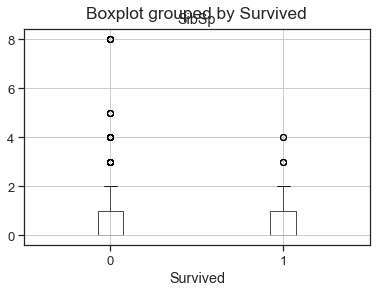

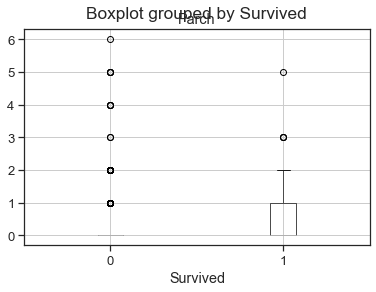

In [479]:
def box_plot(column):
    train_data.boxplot(by = "Survived",column = [column],grid = True, layout=(1, 1))
box_plot('SibSp')
box_plot('Parch')

In [480]:
train_data["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [481]:
indexes = train_data.iloc[:,:].index[train_data.iloc[:,:].SibSp == 8]
train_data.drop(indexes, inplace=True)
print(train_data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [482]:
train_data["Parch"].value_counts()

0    678
1    118
2     73
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [483]:
indexes=train_data.iloc[:,:].index[train_data.iloc[:,:].Parch==6]
train_data.drop(indexes,inplace=True)


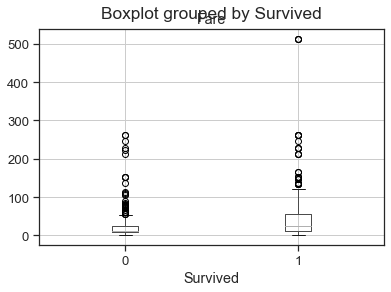

In [484]:
box_plot('Fare')

In [485]:
print('Mean: ',train_data.Fare.mean(),' Median: ',train_data.Fare.median())
train_data.Fare.value_counts()

Mean:  31.891505436013553  Median:  14.4542


8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
7.8000      1
13.8583     1
7.6292      1
15.0500     1
8.6833      1
Name: Fare, Length: 247, dtype: int64

In [486]:
indexes=train_data.index[train_data.Fare>100]
train_data.drop(indexes,inplace=True)

In [487]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


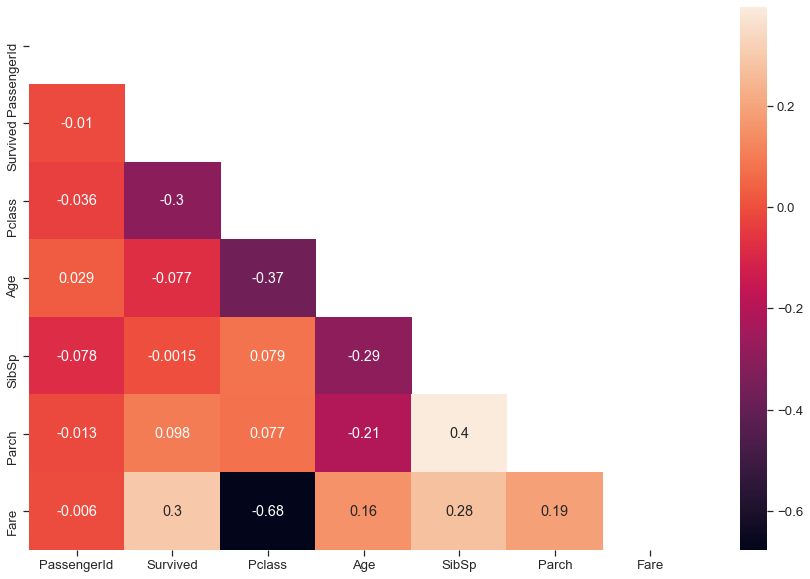

In [488]:
import seaborn as sn
f = plt.figure(figsize=(15, 10))
correlation_matrix = np.triu(train_data.corr())
sn.heatmap(train_data.corr(), annot = True, mask = correlation_matrix)

In [489]:
train_data.drop(columns=['Name', 'Ticket'], axis=1, inplace=True)
test_d.drop(columns=['Name', 'Ticket'], axis=1, inplace=True)

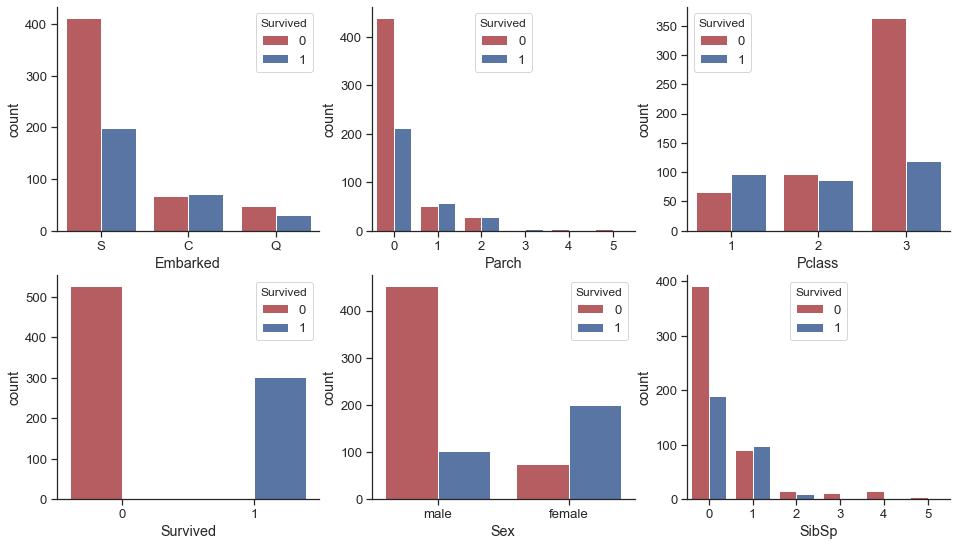

In [490]:
columns = ['Embarked', 'Parch', 'Pclass', 'Survived', 'Sex', 'SibSp']

plt.figure(figsize = (16, 14))
sn.set(font_scale = 1.2)
sn.set_style('ticks')

for i, column in enumerate(columns):
    plt.subplot(3, 3, i + 1)
    sn.countplot(data = train_data, x = column, hue = 'Survived', palette = ['r',"b"])
    
sn.despine()

In [491]:
train_data = pd.get_dummies(train_data, columns=['Pclass', 'Sex', 'Embarked' ], drop_first= True)
test_d = pd.get_dummies(test_d, columns=['Pclass', 'Sex', 'Embarked' ], drop_first= True)

In [492]:
train_data

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,0,1,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,1,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,0,0,1
4,5,0,35.0,0,0,8.0500,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.0,0,0,13.0000,1,0,1,0,1
887,888,1,19.0,0,0,30.0000,0,0,0,0,1
888,889,0,28.0,1,2,23.4500,0,1,0,0,1
889,890,1,26.0,0,0,30.0000,0,0,1,0,0


In [493]:
x_train = train_data.iloc[:,train_data.columns != 'Survived']
y_train = train_data.iloc[:,train_data.columns == 'Survived'].values.reshape(-1,1)
#or 
#y_train=train_data['Survived']
#or
#y_train=train_data.Survived
x_test = test_d

In [495]:
x_test.isna().sum()

PassengerId    0
Age            0
SibSp          0
Parch          0
Fare           0
Pclass_2       0
Pclass_3       0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [496]:

model.fit(x_train, y_train)
model.score(x_train,y_train)

0.3827521941852662

In [497]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier()
classifier_xgb.fit(x_train, y_train)

[20:28:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\abylk\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\abylk\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [498]:
classifier_xgb.score(x_train, y_train)

0.9987951807228915

In [499]:
y_pred_xgb = classifier_xgb.predict(x_test)

In [500]:
print(y_pred_xgb)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


In [470]:
output = pd.DataFrame({'PassengerId': test_d.PassengerId, 'Survived': y_pred_xgb})

output.to_csv('my_submission_xgb.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
